導入必要的庫並讀取資料

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

OPEN = '1. open'
HIGH = '2. high'
LOW = '3. low'
CLOSE = '4. close'
VOLUME = '5. volume'

df = pd.read_csv('data/aapl_intraday_final.csv', index_col=0)

print(df.head())

                  date  1. open  2. high   3. low  4. close  5. volume
0  2024-08-09 19:45:00   163.50   163.80  163.450    163.59     3622.0
1  2024-08-09 19:30:00   163.40   163.65  163.400    163.59      991.0
2  2024-08-09 19:15:00   163.48   163.50  163.343    163.45      468.0
3  2024-08-09 19:00:00   163.48   163.48  163.320    163.40     2014.0
4  2024-08-09 18:45:00   163.39   163.55  163.320    163.33     1062.0


資料載入和基本操作

In [2]:
df.info()

print(df.describe())

print(df.tail())

<class 'pandas.core.frame.DataFrame'>
Index: 1408 entries, 0 to 1407
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1408 non-null   object 
 1   1. open    1408 non-null   float64
 2   2. high    1408 non-null   float64
 3   3. low     1408 non-null   float64
 4   4. close   1408 non-null   float64
 5   5. volume  1408 non-null   float64
dtypes: float64(5), object(1)
memory usage: 77.0+ KB
           1. open      2. high       3. low     4. close     5. volume
count  1408.000000  1408.000000  1408.000000  1408.000000  1.408000e+03
mean    173.134379   173.667778   172.554969   173.119058  5.103978e+05
std       9.414513     9.303539     9.731974     9.397897  1.252369e+06
min     155.005000   156.490000   115.685000   155.410000  2.250000e+02
25%     166.192500   166.738250   165.522500   166.247500  6.377250e+03
50%     171.560000   172.045000   171.275000   171.545000  5.567050e+04
75%     181.903000   1

資料清理和預處理

In [3]:
df['date'] = pd.to_datetime(df['date'])

price_columns = [OPEN, HIGH, LOW, CLOSE]
df[price_columns] = df[price_columns].astype(float)
df[VOLUME] = df[VOLUME].astype(int)

print("缺失值數量:")
print(df.isnull().sum())

df = df.dropna()

print(df.dtypes)
print(df.tail())

缺失值數量:
date         0
1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64
date         datetime64[ns]
1. open             float64
2. high             float64
3. low              float64
4. close            float64
5. volume             int64
dtype: object
                    date  1. open  2. high  3. low  4. close  5. volume
1403 2024-07-11 05:00:00   190.77   190.82  190.61    190.64       1677
1404 2024-07-11 04:45:00   190.86   190.90  190.73    190.79        860
1405 2024-07-11 04:30:00   190.86   190.91  190.77    190.77       2254
1406 2024-07-11 04:15:00   191.14   191.14  190.80    190.86        946
1407 2024-07-11 04:00:00   191.16   191.18  190.88    191.07       2146


基本統計分析

In [4]:
daily_avg = df[price_columns].mean()
print("每日平均價格: ")
print(daily_avg)

max_volumn = df.loc[df[VOLUME].idxmax()]
min_volume = df.loc[df[VOLUME].idxmin()]
print("\n成交量最大的時段: ")
print(max_volumn)
print("\n成交量最小的時段: ")
print(min_volume)

price_std = df[price_columns].std()
price_cv = price_std / df[price_columns].mean()
print("\n價格標準差: ")
print(price_std)
print("\n價格變異係數: ")
print(price_cv)

每日平均價格: 
1. open     173.134379
2. high     173.667778
3. low      172.554969
4. close    173.119058
dtype: float64

成交量最大的時段: 
date         2024-08-06 16:00:00
1. open                   158.31
2. high                  159.495
3. low                    158.15
4. close                  158.38
5. volume               18989899
Name: 207, dtype: object

成交量最小的時段: 
date         2024-07-16 05:45:00
1. open                   187.21
2. high                   187.25
3. low                    187.07
4. close                  187.12
5. volume                    225
Name: 1208, dtype: object

價格標準差: 
1. open     9.414513
2. high     9.303539
3. low      9.731974
4. close    9.397897
dtype: float64

價格變異係數: 
1. open     0.054377
2. high     0.053571
3. low      0.056399
4. close    0.054286
dtype: float64


時間序列分析

DataFrame的列:  Index(['date', '1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')
DataFrame的索引:  Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407],
      dtype='int64', length=1408)


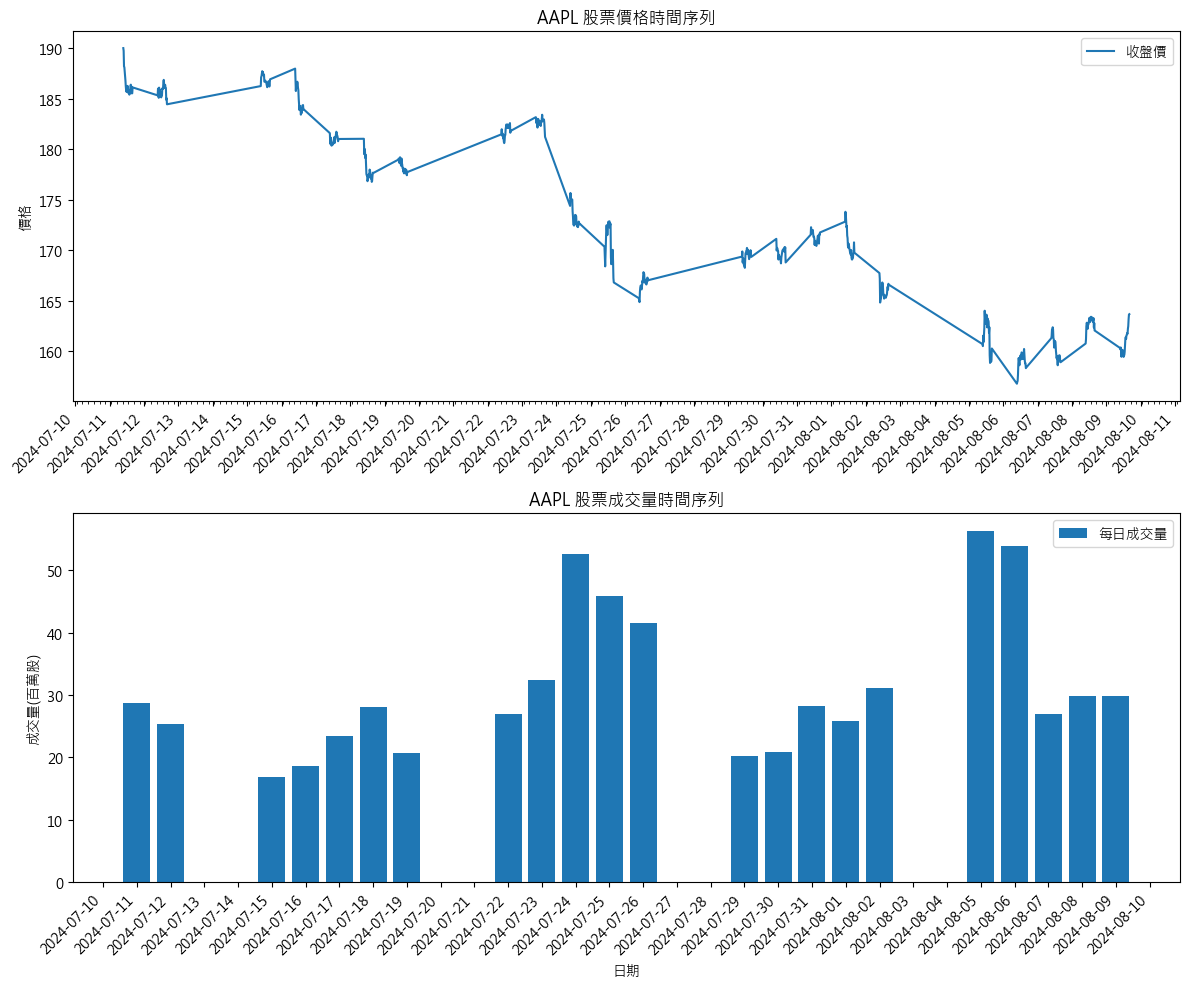

日內收益率統計: 
count    594.000000
mean      -0.000132
std        0.003492
min       -0.019347
25%       -0.001681
50%       -0.000057
75%        0.001578
max        0.034039
Name: returns, dtype: float64


In [6]:
def process_and_plot_stock_data(df_original):
    df = df_original.copy()
    
    print("DataFrame的列: ", df.columns)
    print("DataFrame的索引: ", df.index)

    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values(by='date')

    df['returns'] = df[CLOSE].pct_change()
    df['volume_millions'] = df[VOLUME] / 1_000_000
    df = df.set_index('date')
    df = df[df.index.dayofweek < 5]
    df = df.between_time('09:30', '16:00')

    plt.rc('font', family='Microsoft JhengHei')
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=False)

    ax1.plot(df.index, df[CLOSE], label='收盤價')
    ax1.set_title('AAPL 股票價格時間序列')
    ax1.set_ylabel('價格')
    ax1.legend()

    ax1.xaxis.set_major_locator(mdates.DayLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_minor_locator(mdates.HourLocator(interval=4))
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

    # 繪製每日成交量
    daily_volume = df.groupby(df.index.date)['volume_millions'].sum().reset_index()
    daily_volume.columns = ['date', 'volume_millions']
    ax2.bar(daily_volume['date'], daily_volume['volume_millions'], label='每日成交量', width=0.8)
    ax2.set_title('AAPL 股票成交量時間序列')
    ax2.set_xlabel('日期')
    ax2.set_ylabel('成交量(百萬股)')
    ax2.legend()

    ax2.xaxis.set_major_locator(mdates.DayLocator())
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

    print("日內收益率統計: ")
    print(df['returns'].describe())

process_and_plot_stock_data(df)

移動平均線計算